## Step 1: Import Required Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import joblib

In [ ]:
# Step 2: Load the Dataset and EDA
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
    "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
df = pd.read_csv(url, names=columns)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.shape


(768, 9)

In [7]:
# Step 3: Preprocessing
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Step 4: Define and Train Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))



Logistic Regression Accuracy: 0.7532
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Decision Tree Accuracy: 0.7273
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78        99
           1       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154


Random Forest Accuracy: 0.7403
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accu

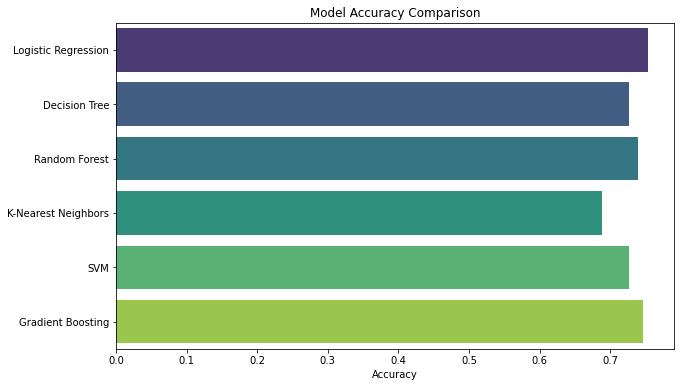

In [9]:
# Step 5: Visualize Model Performance
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.values()), y=list(results.keys()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.show()


In [11]:
# Step 6: Select and Save the Best Model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"Best model: {best_model_name} with accuracy: {results[best_model_name]:.4f}")

# Save the model and the scaler
joblib.dump(best_model, "best_diabetes_model.joblib")
joblib.dump(scaler, "scaler.joblib")


Best model: Logistic Regression with accuracy: 0.7532


['scaler.joblib']

In [19]:
#Step 7: Test the Prediction
newTestData= pd.DataFrame({"pregnancies":10,"glucose":101,"bloodPressure":76,"skinThickness":48,"insulin":180,"bmi":32.9,"diabetesPedigree":0.17,"age":63},index=[0])
model= joblib.load('best_diabetes_model.pkl')
scaler = joblib.load('scaler.pkl') 
scaled_features = scaler.transform(newTestData)
result=model.predict(scaled_features)
if result[0]==1:
    print("The Person is Diabetic")
else:
    print("The Person is Not Diabetic")

The Person is Not Diabetic
